##**Proyek Analisis Data: Air Quality**
- **Nama:** Melicca Shellyn
- **Email:** m004b4kx2461@bangkit.academy
- **ID Dicoding:** meliccashlln

##**Menentukan Pertanyaan Bisnis**

-  Bagaimana hubungan antara PM2.5 dan PM10 dengan variabel lainnya, dan faktor mana yang paling berpengaruh dalam meningkatkan atau menurunkan konsentrasi PM2.5 dan PM10?
- Bagaimana dinamika perubahan rata-rata PM2.5 dan PM10 di setiap stasiun dari 2013-2017? Apakah ada perbedaan signifikan antar stasiun, dan apa yang menyebabkan variasi tingkat polusi?
- Bagaimana perbedaan distribusi konsentrasi PM2.5 dan PM10 di berbagai stasiun, dan bagaimana area dengan konsentrasi tertinggi dapat menjadi fokus mitigasi?

##**Import Semua Packages/Library yang Digunakan**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

#**Data Wrangling**

###Gathering Data

In [45]:
file_paths = [
    "/content/PRSA_Data_Wanshouxigong_20130301-20170228.csv",
    "/content/PRSA_Data_Wanliu_20130301-20170228.csv",
    "/content/PRSA_Data_Tiantan_20130301-20170228.csv",
    "/content/PRSA_Data_Shunyi_20130301-20170228.csv",
    "/content/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "/content/PRSA_Data_Huairou_20130301-20170228.csv",
    "/content/PRSA_Data_Gucheng_20130301-20170228.csv",
    "/content/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "/content/PRSA_Data_Dongsi_20130301-20170228.csv",
    "/content/PRSA_Data_Dingling_20130301-20170228.csv",
    "/content/PRSA_Data_Changping_20130301-20170228.csv",
    "/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv"
]

df_names = [
    "df_wanshouxigong", "df_wanliu", "df_tiantan", "df_shunyi",
    "df_nongzhanguan", "df_huairou", "df_gucheng", "df_guanyuan",
    "df_dongsi", "df_dingling", "df_changping", "df_aotizhongxin"
]

dataframes = {}

for file_path, name in zip(file_paths, df_names):
    dataframes[name] = pd.read_csv(file_path)

dataframes['df_wanshouxigong'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong



**Information**
- PM2.5 adalah partikel polutan udara yang sangat kecil
- PM10 mengacu pada partikel polutan udara yang lebih besar (dengan diameter ≤ 10 mikrometer).
- SO2 adalah konsentrasi gas sulfur dioksida dalam udara
- NO2 adalah konsentrasi nitrogen dioksida di udara
- CO2 adalah konsentrasi gas karbon monoksida di udara
- O3 adalah konsentrasi ozon di udara

**Insight:**
- Terdapat missing values


### Assessing Data

In [4]:
#Missing Values
for name, df in dataframes.items():
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("\n")

Missing values in df_wanshouxigong:
No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64


Missing values in df_wanliu:
No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64


Missing values in df_tiantan:
No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int6

In [5]:
#Duplicate Data
for name, df in dataframes.items():
    print(f"Duplicated rows in {name}: {df.duplicated().sum()}")
    print("\n")

Duplicated rows in df_wanshouxigong: 0


Duplicated rows in df_wanliu: 0


Duplicated rows in df_tiantan: 0


Duplicated rows in df_shunyi: 0


Duplicated rows in df_nongzhanguan: 0


Duplicated rows in df_huairou: 0


Duplicated rows in df_gucheng: 0


Duplicated rows in df_guanyuan: 0


Duplicated rows in df_dongsi: 0


Duplicated rows in df_dingling: 0


Duplicated rows in df_changping: 0


Duplicated rows in df_aotizhongxin: 0




In [6]:
#Inconsistent Values
for name, df in dataframes.items():
    if 'wd' in df.columns:
        print(f"Unique values in 'wd' column for {name}:")
        print(df['wd'].value_counts())
        print("\n")

Unique values in 'wd' column for df_wanshouxigong:
wd
NE     3568
SW     3428
ENE    3080
E      2807
WNW    2565
NW     2552
WSW    2546
W      2464
SSW    2457
ESE    1772
NNE    1564
S      1506
SE     1279
NNW    1187
N      1176
SSE    1034
Name: count, dtype: int64


Unique values in 'wd' column for df_wanliu:
wd
NE     6703
SW     4644
ENE    3642
NNE    3327
N      3219
WSW    2529
SSW    2101
NNW    1397
W      1335
E      1264
NW     1107
S       966
WNW     813
SE      707
SSE     615
ESE     572
Name: count, dtype: int64


Unique values in 'wd' column for df_tiantan:
wd
ENE    3861
E      3564
NE     3540
ESE    2706
SW     2481
NW     2466
SSW    1953
NNE    1928
SE     1880
N      1865
WSW    1769
NNW    1693
S      1547
SSE    1402
WNW    1347
W       984
Name: count, dtype: int64


Unique values in 'wd' column for df_shunyi:
wd
NNE    4540
N      3877
NE     3351
SSE    2963
SE     2665
S      2613
NW     2446
WNW    2051
NNW    1656
SSW    1586
ENE    1416
ESE    1377


In [7]:
#Outliers
columns_to_check = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']
for name, df in dataframes.items():
    for column in columns_to_check:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Outliers in {name} for {column}:")
        print(outliers[[column]])
        print("\n")

Outliers in df_wanshouxigong for PM2.5:
       PM2.5
144    258.0
145    270.0
146    280.0
147    264.0
153    262.0
...      ...
34755  266.0
34756  264.0
34757  262.0
34758  261.0
34759  256.0

[1727 rows x 1 columns]


Outliers in df_wanshouxigong for PM10:
        PM10
154    349.0
155    407.0
156    454.0
157    400.0
158    336.0
...      ...
34483  409.0
34484  389.0
34654  369.0
34655  410.0
34656  388.0

[1311 rows x 1 columns]


Outliers in df_wanshouxigong for SO2:
        SO2
42     51.0
43     53.0
44     63.0
45     72.0
46     82.0
...     ...
34804  49.0
34833  51.0
34834  56.0
34835  55.0
34836  52.0

[3191 rows x 1 columns]


Outliers in df_wanshouxigong for NO2:
         NO2
119    154.0
153    158.0
154    206.0
155    241.0
156    221.0
...      ...
34750  160.0
34751  154.0
34752  162.0
34753  158.0
34754  151.0

[582 rows x 1 columns]


Outliers in df_wanshouxigong for CO:
           CO
104    3399.0
119    3399.0
139    3500.0
140    3700.0
141    4400.0
...  

In [8]:
for name, df in dataframes.items():
    if df['PM2.5'].dtype != 'float64':
        print(f"Invalid values in {name} for PM2.5")

**Insight:**
- Missing values yang signifikan, karena hampir semua dataset mengandung missing values
- Tidak ada duplicate data
- Nilai-nilai di kolom wd yang mempresentasikan arah angin konsisten
- Terdapat banyak outliers pada kolom PM2.5, PM10, SO2, NO2, CO, O3
- Tidak ada invalid values

### Cleaning Data

In [9]:
# Handling Missing Values & Outliers
for name, df in dataframes.items():
    df['PM2.5'].interpolate(method='linear', limit_direction='forward', inplace=True)
    df['PM10'].interpolate(method='linear', limit_direction='forward', inplace=True)
    df['SO2'].interpolate(method='linear', limit_direction='forward', inplace=True)
    df['NO2'].interpolate(method='linear', limit_direction='forward', inplace=True)
    df['CO'].interpolate(method='linear', limit_direction='forward', inplace=True)
    df['O3'].interpolate(method='linear', limit_direction='forward', inplace=True)

    df['TEMP'].fillna(df['TEMP'].mean(), inplace=True)
    df['PRES'].fillna(df['PRES'].mean(), inplace=True)
    df['DEWP'].fillna(df['DEWP'].mean(), inplace=True)
    df['RAIN'].fillna(df['RAIN'].mean(), inplace=True)

    df['wd'].fillna(df['wd'].mode()[0], inplace=True)

    df['WSPM'].fillna(df['WSPM'].mean(), inplace=True)

for name, df in dataframes.items():
    for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = df[col].mask(df[col] < lower_bound, lower_bound)
        df[col] = df[col].mask(df[col] > upper_bound, upper_bound)


<ipython-input-9-42a667425157>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].interpolate(method='linear', limit_direction='forward', inplace=True)
<ipython-input-9-42a667425157>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [10]:
#test
for name, df in dataframes.items():
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("\n")

for name, df in dataframes.items():
    print(f"Outliers in {name} for PM2.5 after cleaning:")
    Q1 = df['PM2.5'].quantile(0.25)
    Q3 = df['PM2.5'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(df[(df['PM2.5'] < lower_bound) | (df['PM2.5'] > upper_bound)])
    print("\n")


Missing values in df_wanshouxigong:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Missing values in df_wanliu:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Missing values in df_tiantan:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Missing values in df_shunyi:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0

In [11]:
dataframes['df_gucheng']['NO2'].fillna(dataframes['df_gucheng']['NO2'].mean(), inplace=True)
dataframes['df_dingling']['NO2'].fillna(dataframes['df_dingling']['NO2'].mean(), inplace=True)

<ipython-input-11-3c02ab1200c1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframes['df_gucheng']['NO2'].fillna(dataframes['df_gucheng']['NO2'].mean(), inplace=True)
<ipython-input-11-3c02ab1200c1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [12]:
print(dataframes['df_gucheng']['NO2'].isnull().sum())
print(dataframes['df_dingling']['NO2'].isnull().sum())

0
0


**Insight:**
- Seluruh kolom di dataframe yang mengandung missing values telah terisi
- Tidak ada outliers

# Exploratory Data Analysis (EDA)

In [47]:
df = pd.concat(dataframes.values(), ignore_index=True)

In [48]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [129]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,76.011595,101.498487,13.546944,50.161449,1138.029489,55.390930,13.538931,1010.746341,2.490654,0.064475,1.729701
std,10122.116943,1.177198,3.448707,8.800102,6.922195,68.179724,80.307238,14.268192,33.949931,835.818274,51.215444,11.430737,10.469404,13.787251,0.820624,1.245924
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,263.000000,350.000000,55.500000,167.684900,3350.000000,195.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [130]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

eda_results = {}

for pollutant in pollutants:
    eda_results[pollutant] = {
        'nunique': df[pollutant].nunique(),
        'max': df[pollutant].max(),
        'min': df[pollutant].min(),
        'mean': df[pollutant].mean(),
        'std': df[pollutant].std()
    }

import pandas as pd
eda_df = pd.DataFrame(eda_results).transpose()

print(eda_df)

       nunique        max       min         mean         std
PM2.5   4895.0   263.0000    2.0000    76.011595   68.179724
PM10    4007.0   350.0000    2.0000   101.498487   80.307238
SO2     3851.0    55.5000    0.2856    13.546944   14.268192
NO2     7853.0   167.6849    1.0265    50.161449   33.949931
CO      9886.0  3350.0000  100.0000  1138.029489  835.818274
O3      7795.0   195.0000    0.2142    55.390930   51.215444


In [19]:
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

df_agg_month = df.groupby(['station', 'year_month'])[numeric_columns].mean().reset_index()

print(df_agg_month.head())

        station year_month      No    year  month   day  hour       PM2.5  \
0  Aotizhongxin    2013-10  5508.5  2013.0   10.0  16.0  11.5   91.840054   
1  Aotizhongxin    2013-11  6240.5  2013.0   11.0  15.5  11.5   76.314583   
2  Aotizhongxin    2013-12  6972.5  2013.0   12.0  16.0  11.5   73.115591   
3  Aotizhongxin     2013-3   372.5  2013.0    3.0  16.0  11.5  104.447581   
4  Aotizhongxin     2013-4  1104.5  2013.0    4.0  15.5  11.5   62.718056   

         PM10        SO2        NO2           CO         O3       TEMP  \
0  119.104839  20.897663  73.380086  1078.293011  20.690349  12.809812   
1  105.611111  22.667361  59.915278  1375.347222  18.827889   5.530972   
2  104.060484  31.423485  62.084119  1464.684140  14.920455  -0.161290   
3  138.663978  31.649194  73.737131  1417.610887  46.810691   6.053629   
4  108.130556  22.064007  53.501374   908.902778  48.888799  12.260694   

          PRES       DEWP      RAIN      WSPM  
0  1016.268952   5.981855  0.003763  1.16962

**Insight:**
- Stasiun Aotizhongxin sering mengalami polusi udara yang cukup tinggi, terutama pada PM10. Upaya untuk mengurangi polusi udara sangat diperlukan di area ini.

## **Visualization & Explanatory Analysis**

          PM2.5      PM10       SO2       NO2        CO      TEMP        O3  \
PM2.5  1.000000  0.888830  0.509479  0.661656  0.789838 -0.107901 -0.167785   
PM10   0.888830  1.000000  0.503072  0.665478  0.708427 -0.078502 -0.130341   
SO2    0.509479  0.503072  1.000000  0.537439  0.602427 -0.359070 -0.190364   
NO2    0.661656  0.665478  0.537439  1.000000  0.720274 -0.278513 -0.505103   
CO     0.789838  0.708427  0.602427  0.720274  1.000000 -0.317272 -0.364676   
TEMP  -0.107901 -0.078502 -0.359070 -0.278513 -0.317272  1.000000  0.607535   
O3    -0.167785 -0.130341 -0.190364 -0.505103 -0.364676  0.607535  1.000000   
PRES   0.000336 -0.033788  0.260686  0.180292  0.183504 -0.813277 -0.457322   
DEWP   0.147764  0.095623 -0.304347 -0.030661 -0.026579  0.820114  0.312558   
RAIN  -0.014011 -0.028357 -0.048787 -0.044260 -0.010485  0.037635  0.027376   
WSPM  -0.293097 -0.207609 -0.116960 -0.402771 -0.340953  0.033031  0.311644   

           PRES      DEWP      RAIN      WSPM  
PM2

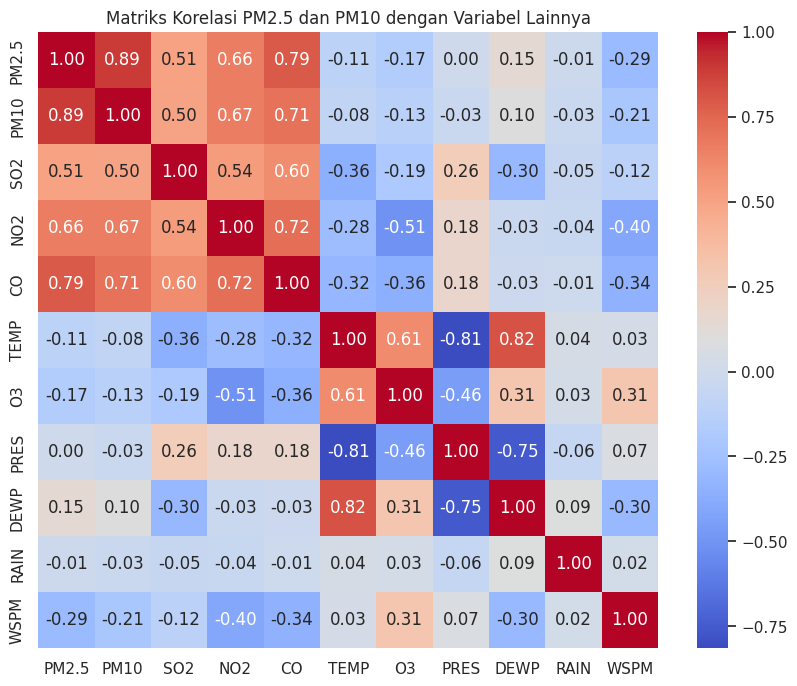

In [40]:
# Correlation matrix
corr_matrix = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'TEMP', 'O3', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
print(corr_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi PM2.5 dan PM10 dengan Variabel Lainnya')
plt.show()

**Pertanyaan 1 : Bagaimana hubungan antara PM2.5 dan PM10 dengan variabel lainnya, dan faktor mana yang paling berpengaruh dalam meningkatkan atau menurunkan konsentrasi PM2.5 dan PM10?**

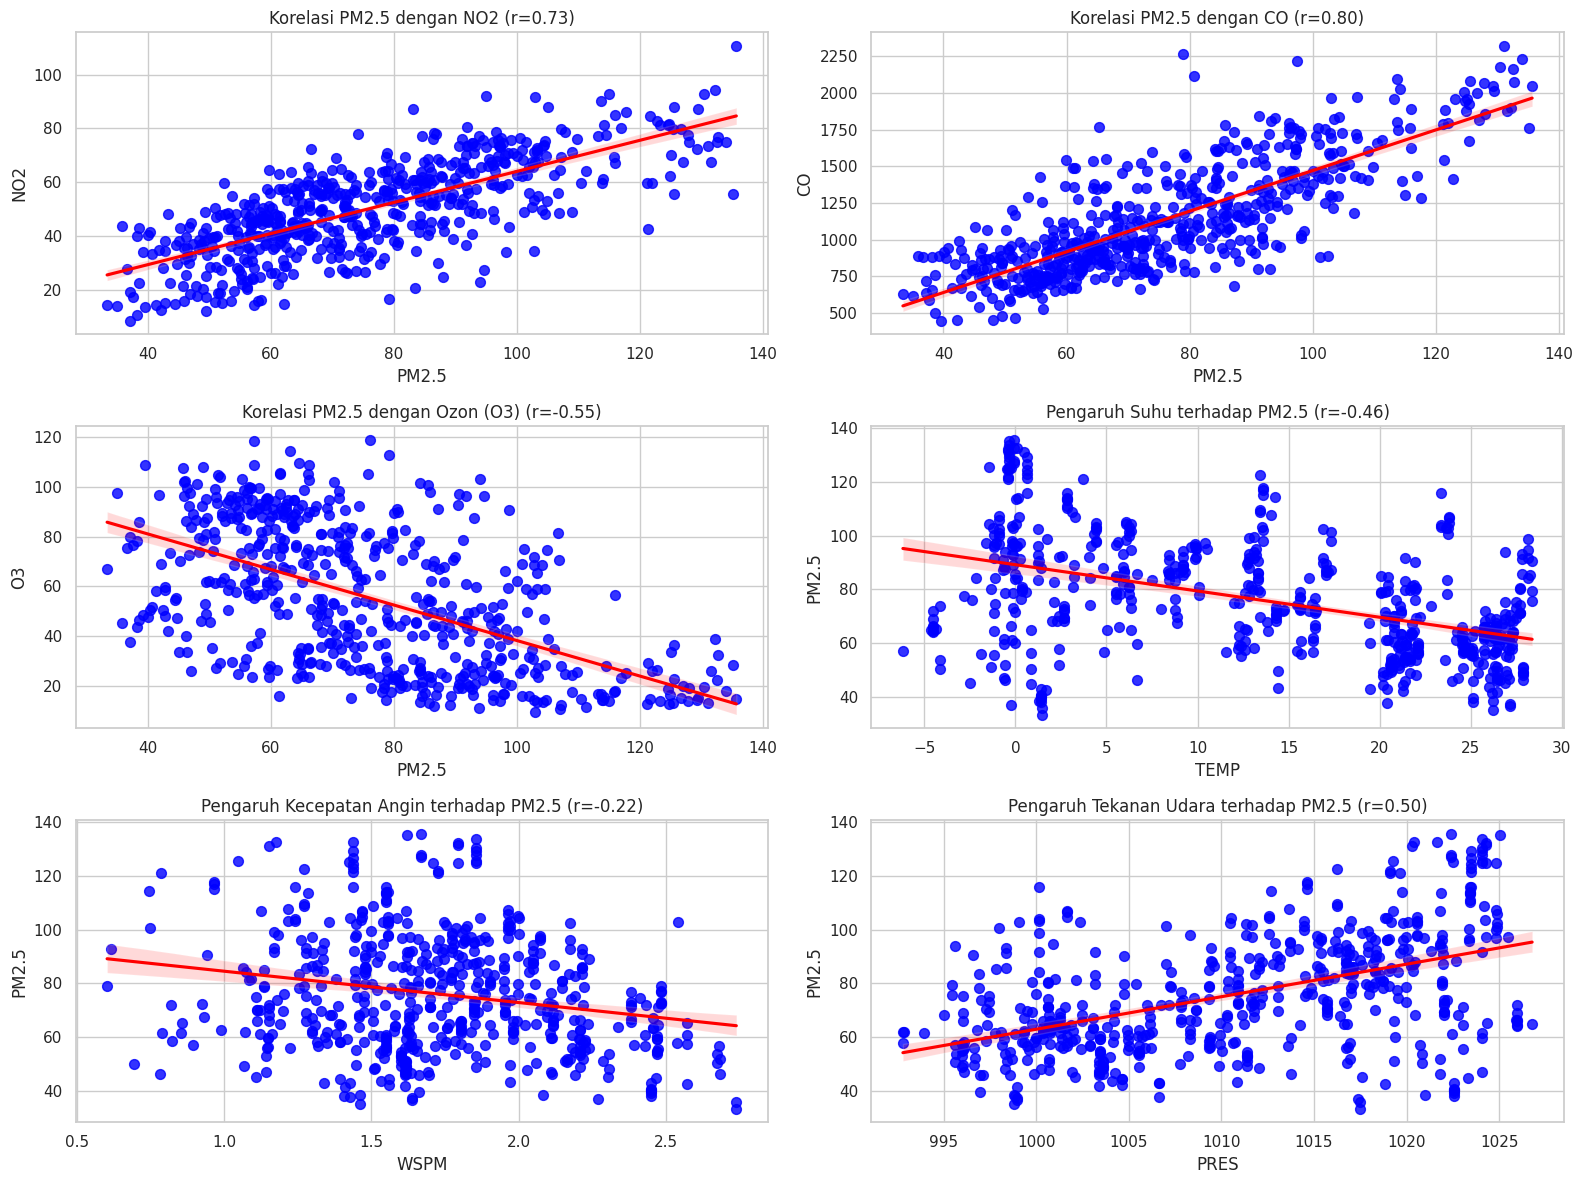

In [38]:
scatter_color = 'blue'
line_color = 'red'

plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
sns.regplot(x='PM2.5', y='NO2', data=df_agg_month, color=line_color, scatter_kws={'s':50, 'alpha':0.8, 'color': scatter_color}, line_kws={'color':line_color})
plt.title('Korelasi PM2.5 dengan NO2 (r={:.2f})'.format(pearsonr(df_agg_month['PM2.5'], df_agg_month['NO2'])[0]), fontsize=12)

plt.subplot(3, 2, 2)
sns.regplot(x='PM2.5', y='CO', data=df_agg_month, color=line_color, scatter_kws={'s':50, 'alpha':0.8, 'color': scatter_color}, line_kws={'color':line_color})
plt.title('Korelasi PM2.5 dengan CO (r={:.2f})'.format(pearsonr(df_agg_month['PM2.5'], df_agg_month['CO'])[0]), fontsize=12)

plt.subplot(3, 2, 3)
sns.regplot(x='PM2.5', y='O3', data=df_agg_month, color=line_color, scatter_kws={'s':50, 'alpha':0.8, 'color': scatter_color}, line_kws={'color':line_color})
plt.title('Korelasi PM2.5 dengan Ozon (O3) (r={:.2f})'.format(pearsonr(df_agg_month['PM2.5'], df_agg_month['O3'])[0]), fontsize=12)

plt.subplot(3, 2, 4)
sns.regplot(x='TEMP', y='PM2.5', data=df_agg_month, color=line_color, scatter_kws={'s':50, 'alpha':0.8, 'color': scatter_color}, line_kws={'color':line_color})
plt.title('Pengaruh Suhu terhadap PM2.5 (r={:.2f})'.format(pearsonr(df_agg_month['TEMP'], df_agg_month['PM2.5'])[0]), fontsize=12)

plt.subplot(3, 2, 5)
sns.regplot(x='WSPM', y='PM2.5', data=df_agg_month, color=line_color, scatter_kws={'s':50, 'alpha':0.8, 'color': scatter_color}, line_kws={'color':line_color})
plt.title('Pengaruh Kecepatan Angin terhadap PM2.5 (r={:.2f})'.format(pearsonr(df_agg_month['WSPM'], df_agg_month['PM2.5'])[0]), fontsize=12)

plt.subplot(3, 2, 6)
sns.regplot(x='PRES', y='PM2.5', data=df_agg_month, color=line_color, scatter_kws={'s':50, 'alpha':0.8, 'color': scatter_color}, line_kws={'color':line_color})
plt.title('Pengaruh Tekanan Udara terhadap PM2.5 (r={:.2f})'.format(pearsonr(df_agg_month['PRES'], df_agg_month['PM2.5'])[0]), fontsize=12)

plt.tight_layout()
plt.show()



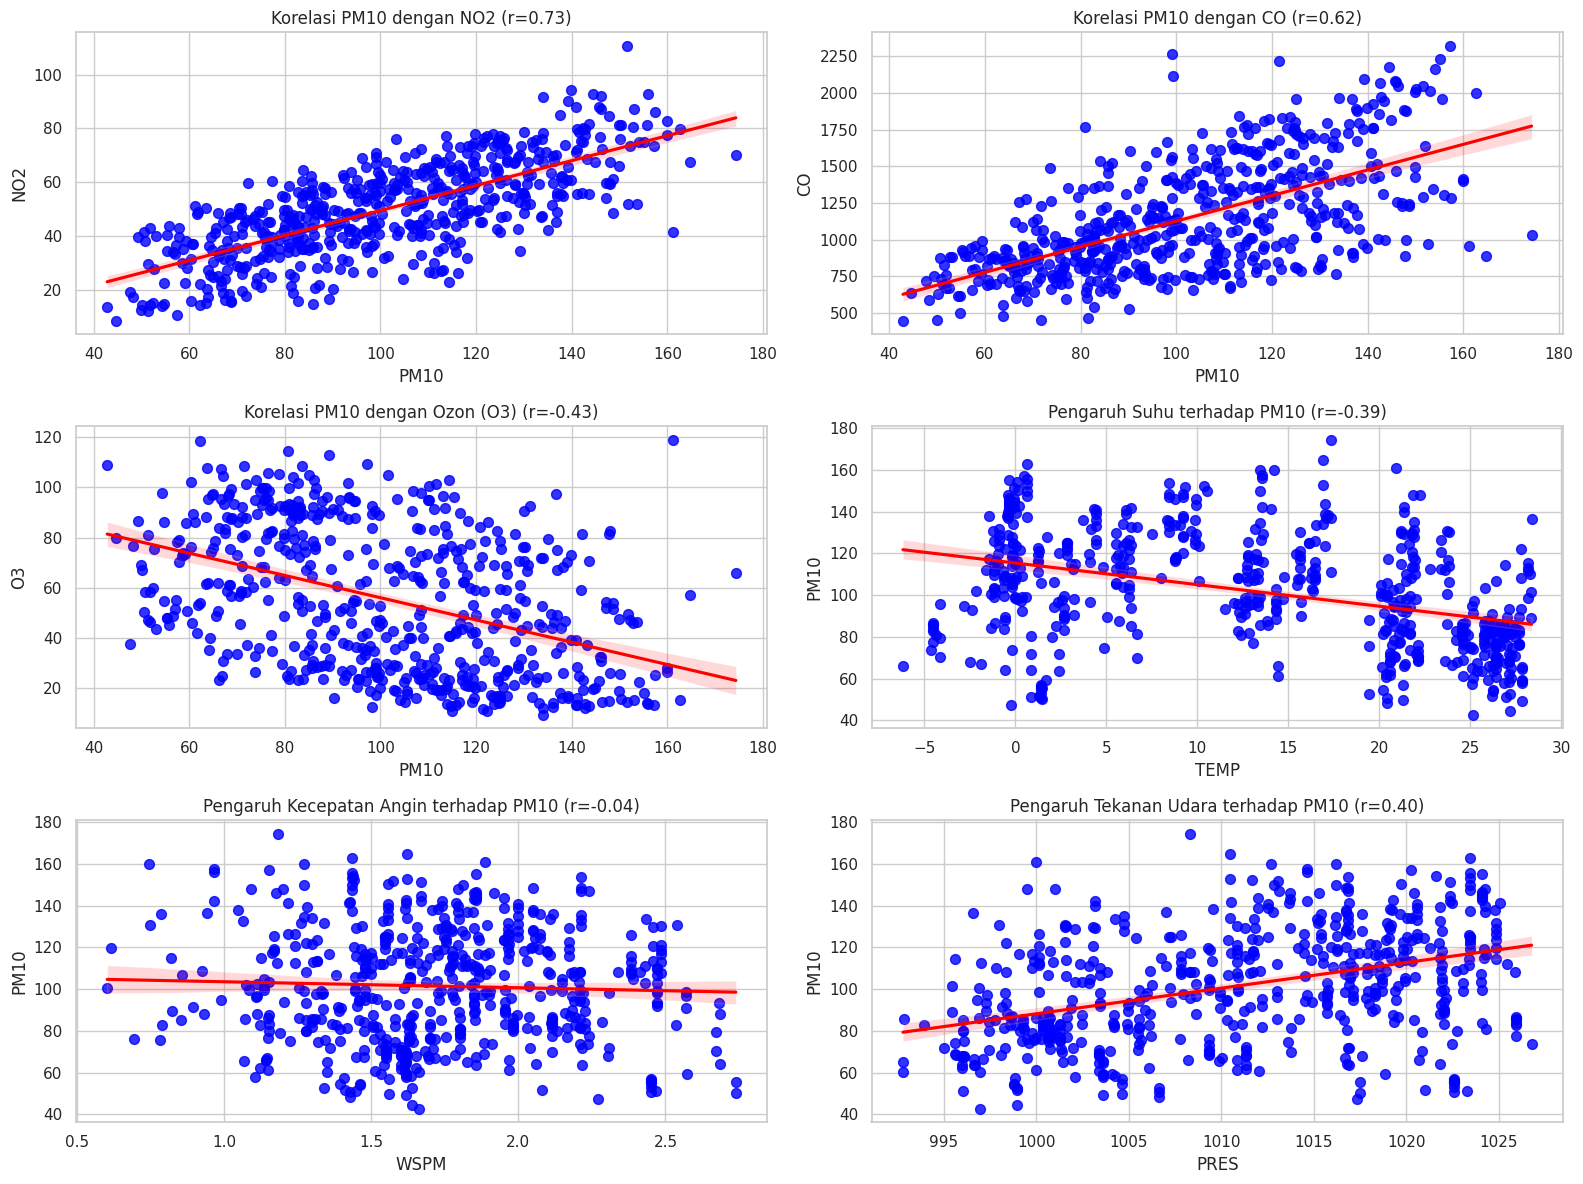

In [39]:
scatter_color = 'blue'
line_color = 'red'

plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
sns.regplot(x='PM10', y='NO2', data=df_agg_month, color=line_color, scatter_kws={'s':50, 'alpha':0.8, 'color': scatter_color}, line_kws={'color':line_color})
plt.title('Korelasi PM10 dengan NO2 (r={:.2f})'.format(pearsonr(df_agg_month['PM10'], df_agg_month['NO2'])[0]), fontsize=12)

plt.subplot(3, 2, 2)
sns.regplot(x='PM10', y='CO', data=df_agg_month, color=line_color, scatter_kws={'s':50, 'alpha':0.8, 'color': scatter_color}, line_kws={'color':line_color})
plt.title('Korelasi PM10 dengan CO (r={:.2f})'.format(pearsonr(df_agg_month['PM10'], df_agg_month['CO'])[0]), fontsize=12)

plt.subplot(3, 2, 3)
sns.regplot(x='PM10', y='O3', data=df_agg_month, color=line_color, scatter_kws={'s':50, 'alpha':0.8, 'color': scatter_color}, line_kws={'color':line_color})
plt.title('Korelasi PM10 dengan Ozon (O3) (r={:.2f})'.format(pearsonr(df_agg_month['PM10'], df_agg_month['O3'])[0]), fontsize=12)

plt.subplot(3, 2, 4)
sns.regplot(x='TEMP', y='PM10', data=df_agg_month, color=line_color, scatter_kws={'s':50, 'alpha':0.8, 'color': scatter_color}, line_kws={'color':line_color})
plt.title('Pengaruh Suhu terhadap PM10 (r={:.2f})'.format(pearsonr(df_agg_month['TEMP'], df_agg_month['PM10'])[0]), fontsize=12)

plt.subplot(3, 2, 5)
sns.regplot(x='WSPM', y='PM10', data=df_agg_month, color=line_color, scatter_kws={'s':50, 'alpha':0.8, 'color': scatter_color}, line_kws={'color':line_color})
plt.title('Pengaruh Kecepatan Angin terhadap PM10 (r={:.2f})'.format(pearsonr(df_agg_month['WSPM'], df_agg_month['PM10'])[0]), fontsize=12)

plt.subplot(3, 2, 6)
sns.regplot(x='PRES', y='PM10', data=df_agg_month, color=line_color, scatter_kws={'s':50, 'alpha':0.8, 'color': scatter_color}, line_kws={'color':line_color})
plt.title('Pengaruh Tekanan Udara terhadap PM10 (r={:.2f})'.format(pearsonr(df_agg_month['PRES'], df_agg_month['PM10'])[0]), fontsize=12)

plt.tight_layout()
plt.show()

**Insight**
- NO2 dan CO memiliki korelasi positif yang kuat dengan PM2.5 (r=0.73 untuk NO2, r=0.80 untuk CO) dan PM10 (r=0.73 untuk NO2, r=0.62 untuk CO). Ini menunjukkan bahwa polusi dari kendaraan bermotor dan industri secara signifikan meningkatkan konsentrasi PM2.5 dan PM10.
- Ozon (O3) memiliki korelasi negatif dengan PM2.5 (r=-0.55) dan PM10 (r=-0.43), artinya peningkatan Ozon menurunkan konsentrasi PM, kemungkinan terkait reaksi kimia di atmosfer.
- Suhu (TEMP) memiliki korelasi negatif sedang dengan PM2.5 (r=-0.46) dan PM10 (r=-0.39), menunjukkan bahwa suhu yang lebih tinggi menurunkan konsentrasi polutan.
- Kecepatan Angin (WSPM) menunjukkan hubungan lemah dengan PM2.5 (r=-0.22) dan PM10 (r=-0.04), menandakan dampaknya kecil pada penyebaran polusi.
- Tekanan Udara (PRES) memiliki korelasi positif sedang dengan PM2.5 (r=0.50) dan PM10 (r=0.40), menunjukkan bahwa tekanan udara tinggi meningkatkan konsentrasi polutan.

 **Pertanyaan 2 : Bagaimana dinamika perubahan rata-rata PM2.5 dan PM10 di setiap stasiun dari 2013-2017? Apakah ada perbedaan signifikan antar stasiun, dan apa yang menyebabkan variasi tingkat polusi?**

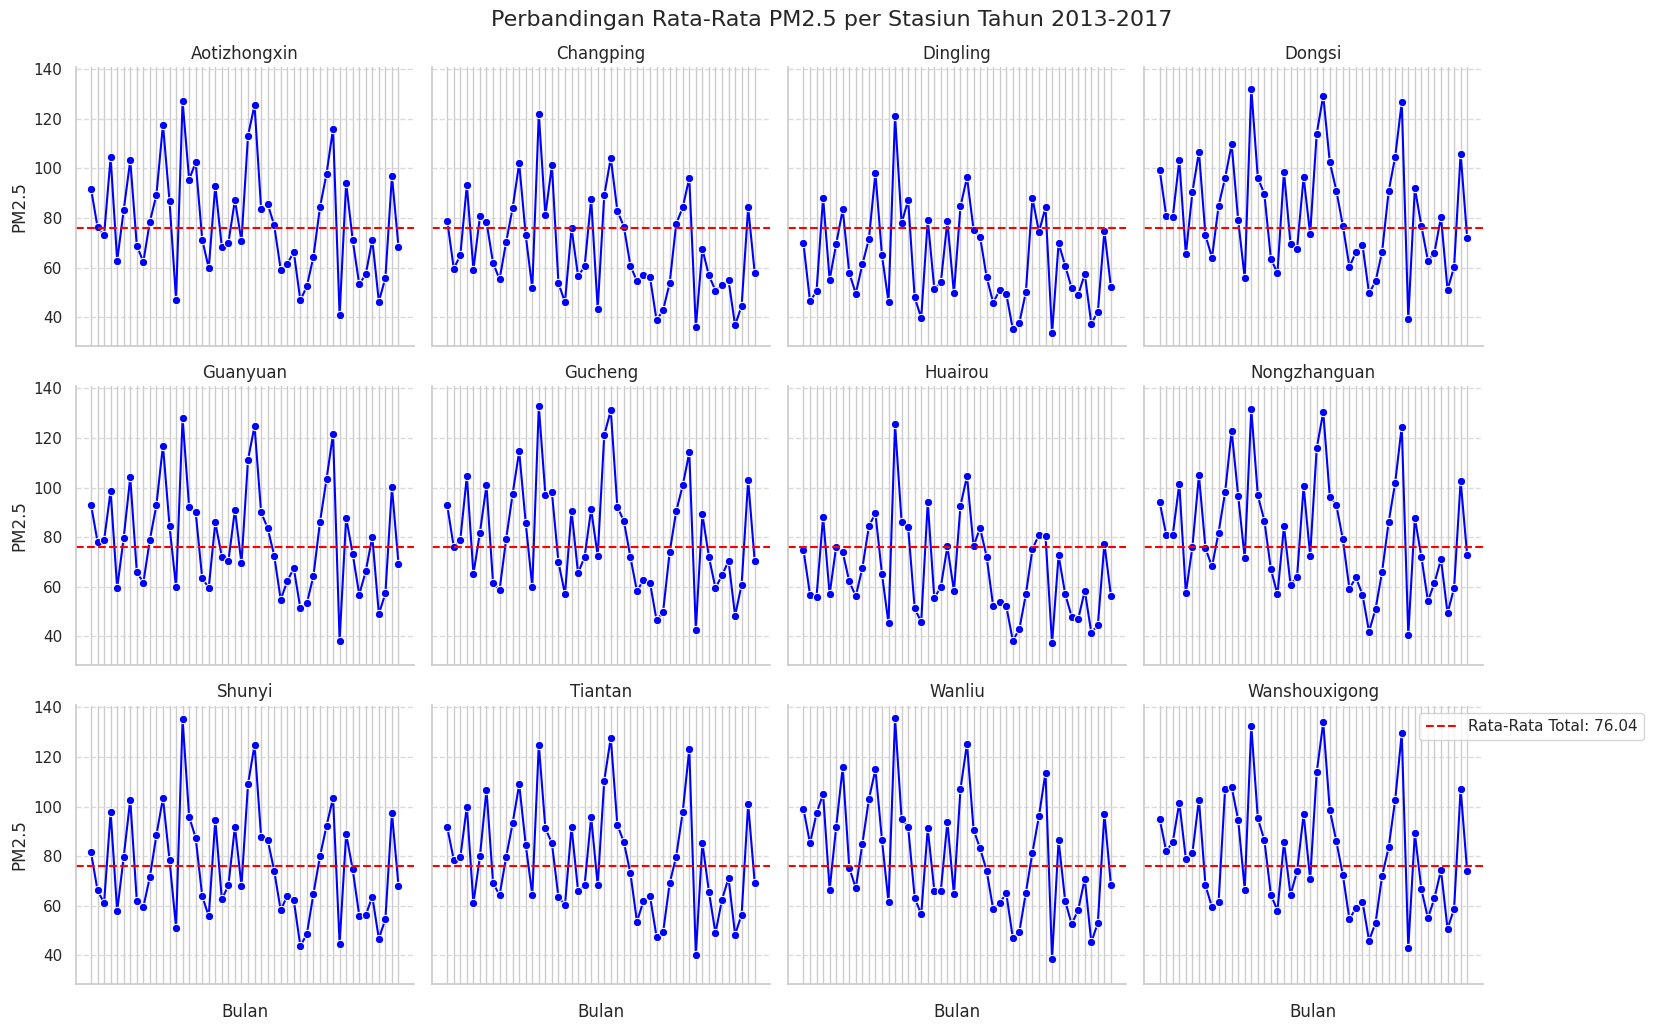

In [35]:
mean_pm25 = df_agg_month['PM2.5'].mean()

g = sns.FacetGrid(df_agg_month, col="station", col_wrap=4, height=3.5, aspect=1.2)
g.map(sns.lineplot, 'year_month', 'PM2.5', marker='o', color='blue')

for ax in g.axes.flat:
    ax.axhline(mean_pm25, ls='--', color='red', label=f'Rata-Rata Total: {mean_pm25:.2f}')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

g.set_titles("{col_name}")
g.set_axis_labels("Bulan", "PM2.5")
g.set_xticklabels(rotation=45)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Perbandingan Rata-Rata PM2.5 per Stasiun Tahun 2013-2017', fontsize=16)

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.tight_layout()
plt.show()

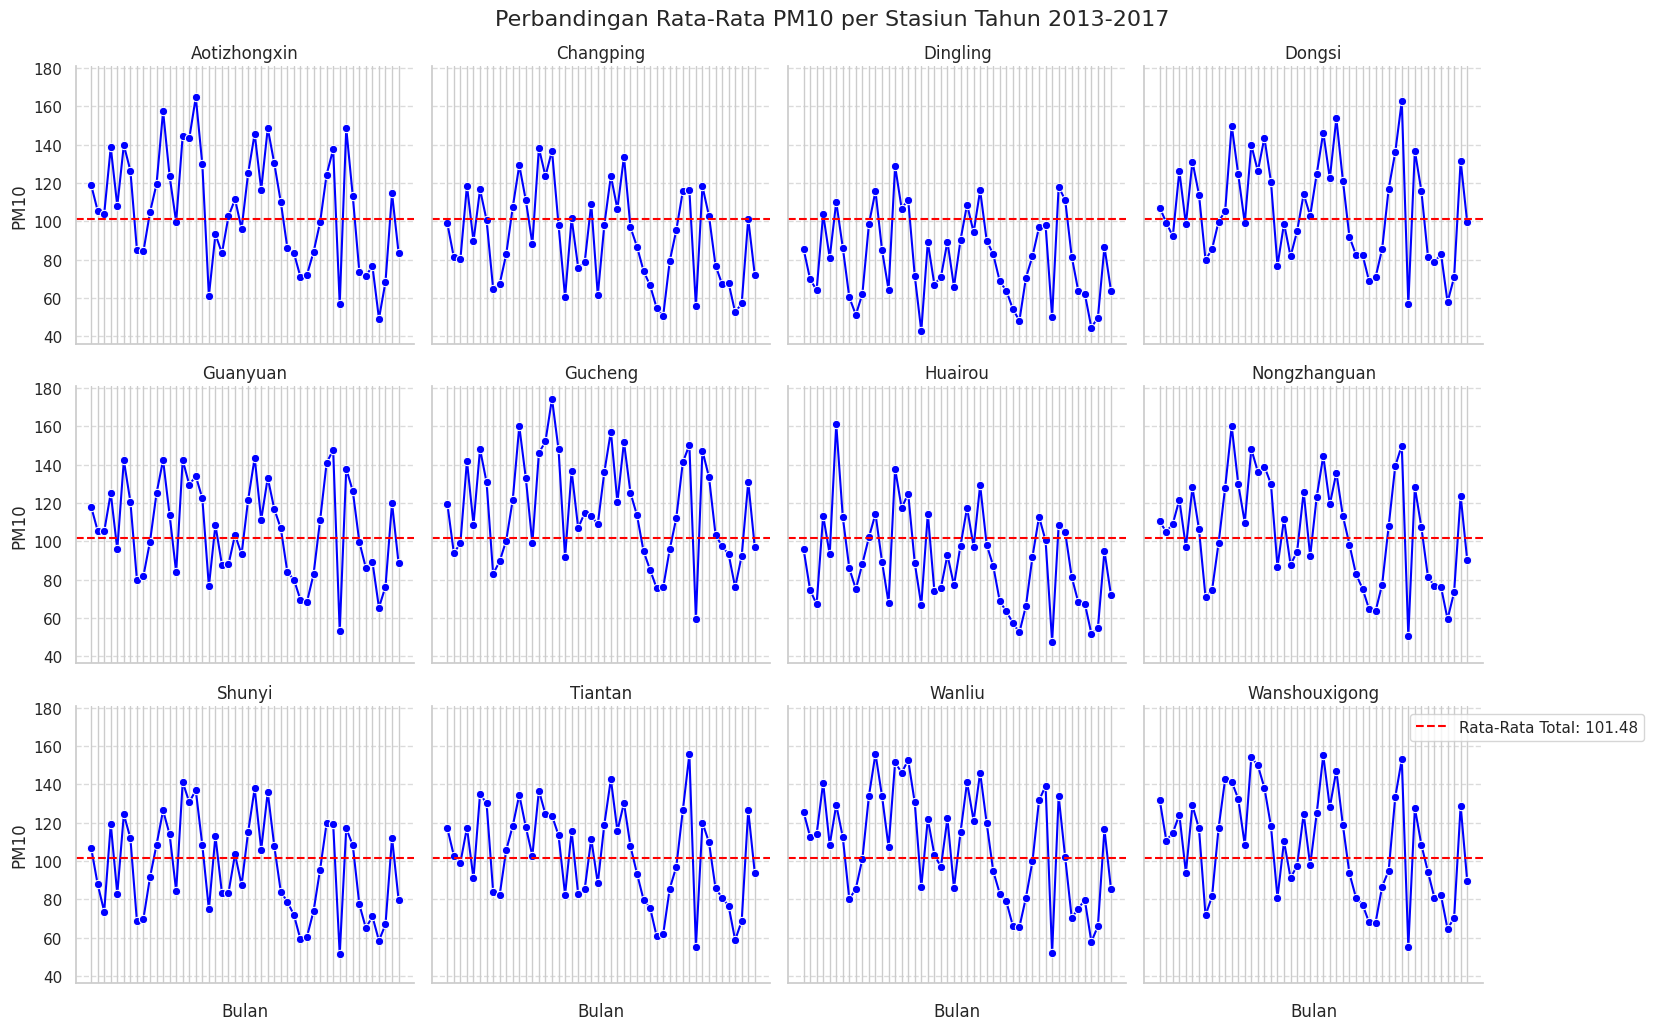

In [34]:
mean_pm25 = df_agg_month['PM10'].mean()

g = sns.FacetGrid(df_agg_month, col="station", col_wrap=4, height=3.5, aspect=1.2)
g.map(sns.lineplot, 'year_month', 'PM10', marker='o', color='blue')

for ax in g.axes.flat:
    ax.axhline(mean_pm25, ls='--', color='red', label=f'Rata-Rata Total: {mean_pm25:.2f}')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

g.set_titles("{col_name}")
g.set_axis_labels("Bulan", "PM10")
g.set_xticklabels(rotation=45)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Perbandingan Rata-Rata PM10 per Stasiun Tahun 2013-2017', fontsize=16)

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.tight_layout()

**Insight**

- Secara umum, fluktuasi konsentrasi PM2.5 dan PM10 di setiap stasiun menunjukkan variasi yang signifikan dari bulan ke bulan selama periode 2013-2017.
- PM2.5: Rata-rata total 76,04, dengan stasiun Dongsi dan GuCheng cenderung memiliki konsentrasi yang lebih tinggi secara konsisten dibandingkan stasiun lain.
- PM10: Rata-rata total 101,48, dengan stasiun Wanshouxigong dan Wanliu memiliki konsentrasi lebih tinggi dibandingkan stasiun lain, menunjukkan polusi udara yang lebih parah di area tersebut.
- Perbedaan signifikan antara stasiun dapat dilihat dari tingkat variasi bulanan di beberapa stasiun, terutama Dongsi dan Wanshouxigong yang memiliki tingkat polusi lebih tinggi dibandingkan Huairou dan Shunyi yang cenderung lebih rendah.
- Faktor-faktor yang mempengaruhi perbedaan ini mungkin termasuk aktivitas industri, kepadatan penduduk, dan lokasi geografis setiap stasiun. Stasiun yang berada di daerah padat penduduk dan kawasan industri cenderung memiliki konsentrasi PM2.5 dan PM10 yang lebih tinggi

**Pertanyaan 3 : Bagaimana perbedaan distribusi konsentrasi PM2.5 dan PM10 di berbagai stasiun, dan bagaimana area dengan konsentrasi tertinggi dapat menjadi fokus mitigasi?**

<ipython-input-46-01e13a523a26>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_agg_month, x='station', y='PM2.5', palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_gro

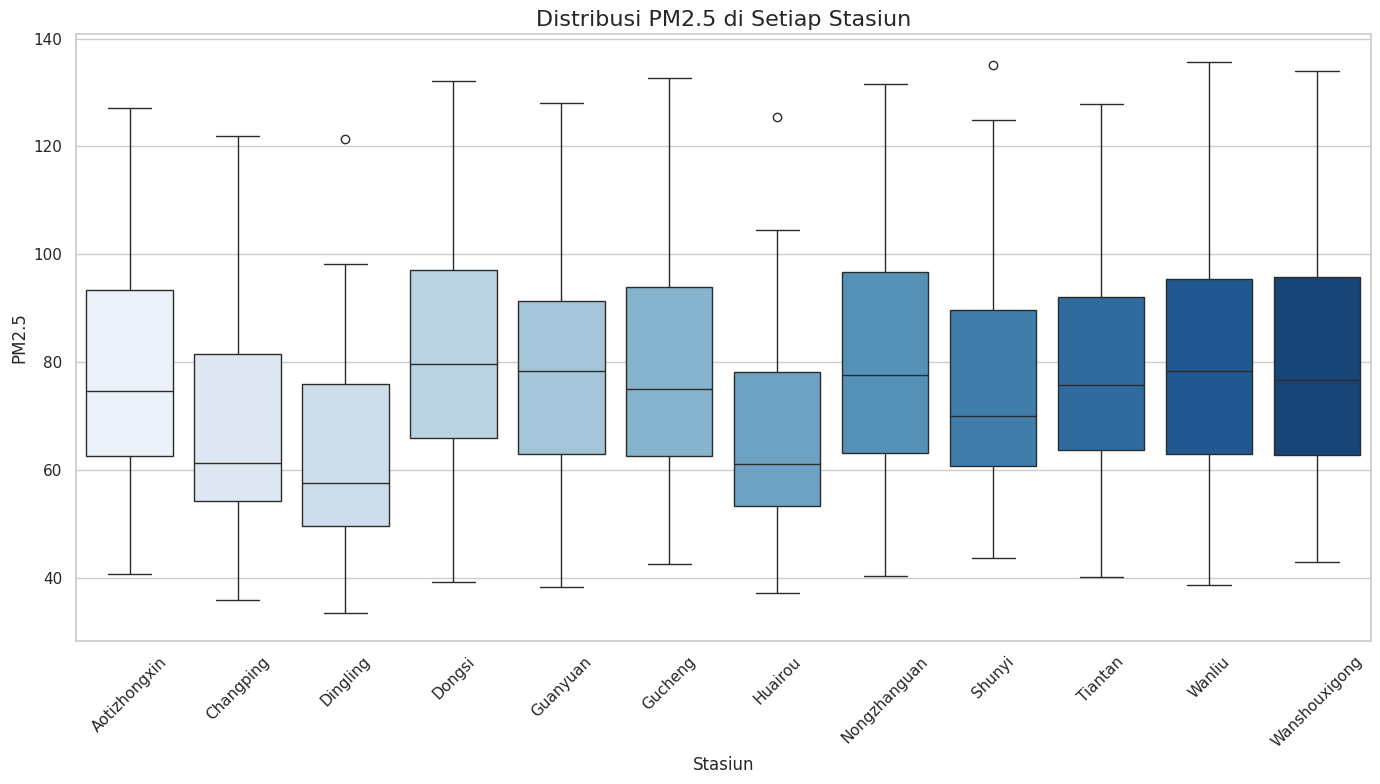

<ipython-input-46-01e13a523a26>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_agg_month, x='station', y='PM10', palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_gro

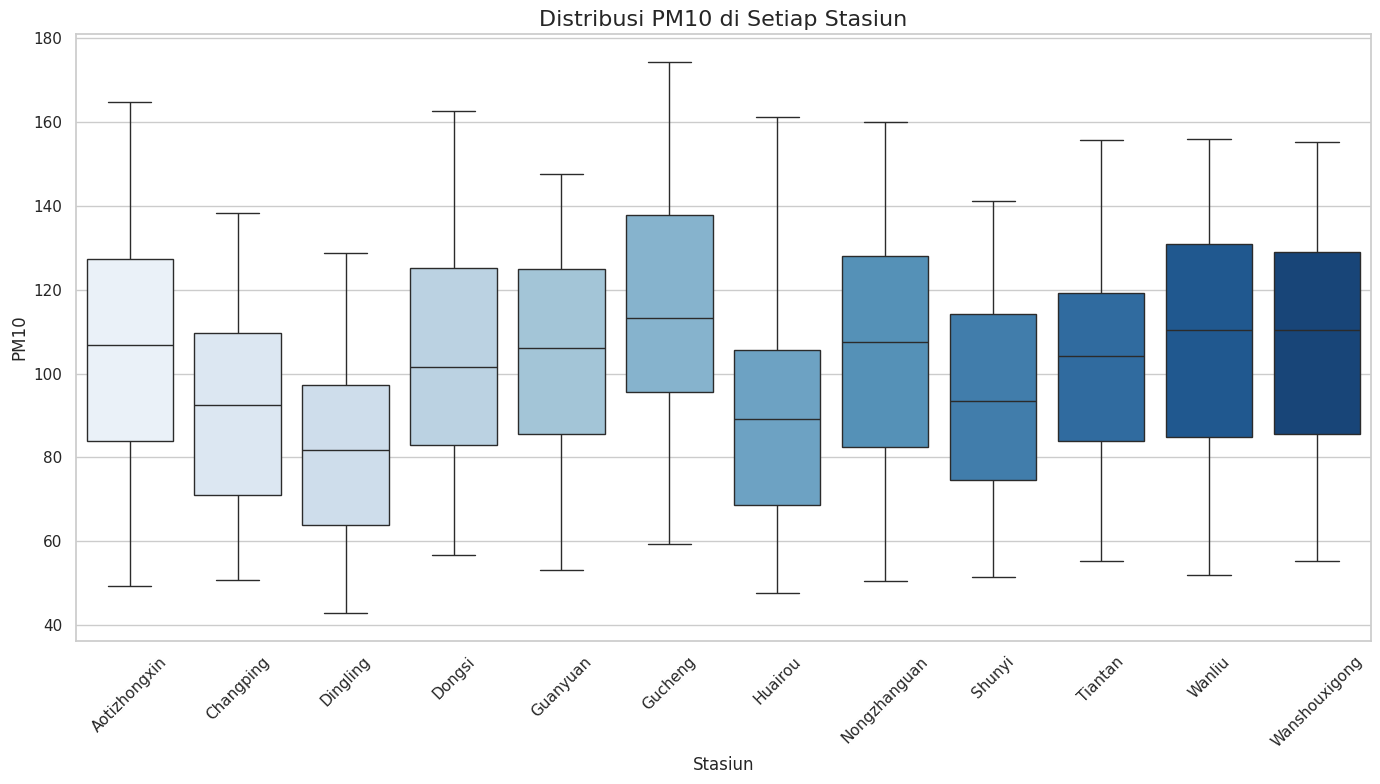

In [46]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_agg_month, x='station', y='PM2.5', palette='Blues')
plt.title('Distribusi PM2.5 di Setiap Stasiun', fontsize=16)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('PM2.5', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_agg_month, x='station', y='PM10', palette='Blues')
plt.title('Distribusi PM10 di Setiap Stasiun', fontsize=16)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('PM10', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**

- Konsentrasi PM2.5 bervariasi di tiap stasiun. Stasiun Dongsi dan Wanshouxigong memiliki rentang konsentrasi yang lebih tinggi, sementara Dingling memiliki konsentrasi terendah. Outlier terlihat di beberapa stasiun, terutama Changping dan Dongsi, yang mungkin menunjukkan kejadian polusi yang tidak biasa.


- Konsentrasi PM10 juga menunjukkan variasi. GuCheng dan Wanliu memiliki konsentrasi PM10 lebih tinggi dibandingkan stasiun lain, dengan rentang nilai yang lebih besar. Dingling dan Huairou menunjukkan rentang konsentrasi PM10 yang lebih rendah.

ANALISIS LANJUTAN

        station year_month       PM2.5 PM2.5_bin        PM10 PM10_bin
0  Aotizhongxin    2013-10   91.840054  Moderate  119.104839     High
1  Aotizhongxin    2013-11   76.314583  Moderate  105.611111     High
2  Aotizhongxin    2013-12   73.115591  Moderate  104.060484     High
3  Aotizhongxin     2013-3  104.447581      High  138.663978     High
4  Aotizhongxin     2013-4   62.718056  Moderate  108.130556     High


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

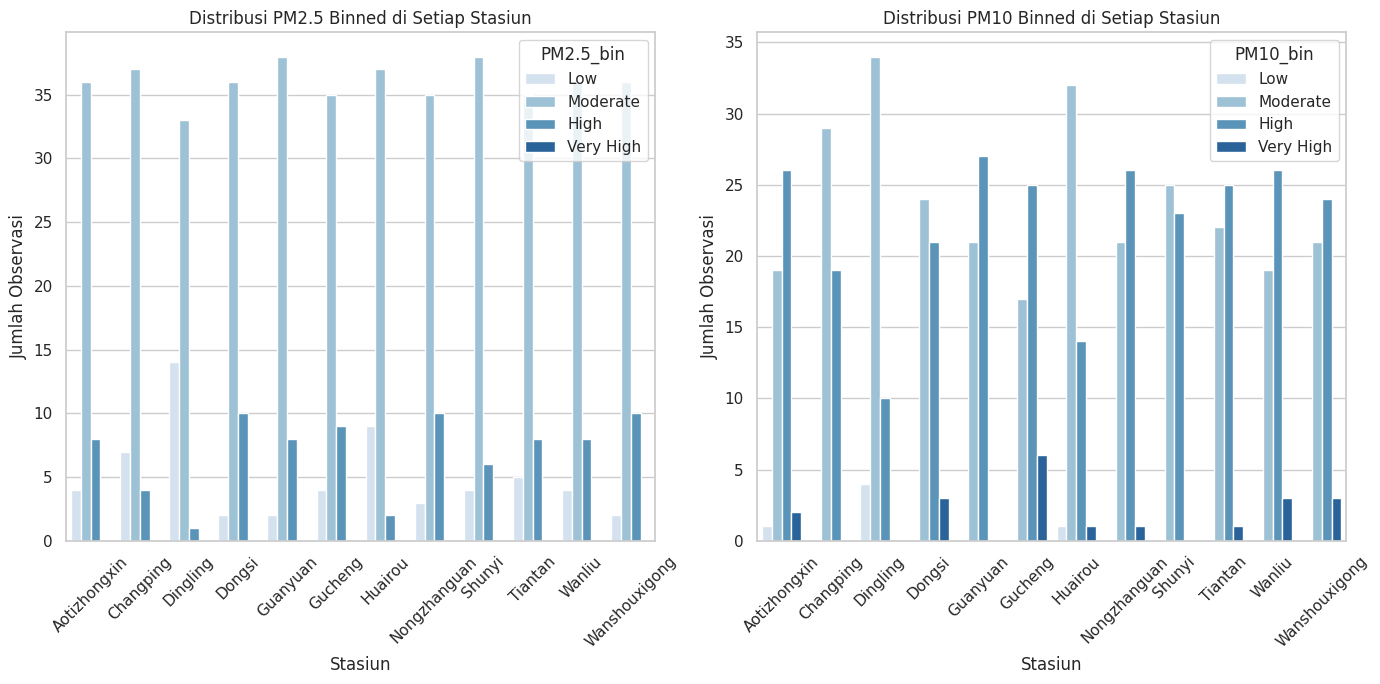

In [42]:
bins_pm25 = [0, 50, 100, 150, np.inf]
bins_pm10 = [0, 50, 100, 150, np.inf]
labels = ['Low', 'Moderate', 'High', 'Very High']

df_agg_month['PM2.5_bin'] = pd.cut(df_agg_month['PM2.5'], bins=bins_pm25, labels=labels)
df_agg_month['PM10_bin'] = pd.cut(df_agg_month['PM10'], bins=bins_pm10, labels=labels)

print(df_agg_month[['station', 'year_month', 'PM2.5', 'PM2.5_bin', 'PM10', 'PM10_bin']].head())

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x='station', hue='PM2.5_bin', data=df_agg_month, palette="Blues")
plt.title('Distribusi PM2.5 Binned di Setiap Stasiun')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Observasi')
plt.xlabel('Stasiun')

plt.subplot(1, 2, 2)
sns.countplot(x='station', hue='PM10_bin', data=df_agg_month, palette="Blues")
plt.title('Distribusi PM10 Binned di Setiap Stasiun')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Observasi')
plt.xlabel('Stasiun')

plt.tight_layout()
plt.show()

**Insight**
- Stasiun Aotizhongxin: Mendominasi pada kategori PM2.5 dan PM10 dalam tingkat sedang (Moderate).
- Stasiun Dingling: Menunjukkan lebih banyak pengamatan PM10 pada kategori sangat tinggi (Very High), dibandingkan PM2.5.
- Stasiun GuanYuan dan Huairou: Cenderung memiliki pengamatan rendah di semua kategori untuk kedua polutan.
- Polusi PM2.5 dan PM10: Secara umum, distribusi menunjukkan lebih banyak pengamatan di kategori Low hingga Moderate, dengan beberapa stasiun memiliki puncak di High dan Very High.

## Conclusion

- Conclution pertanyaan 1 : Faktor utama yang meningkatkan polusi udara adalah NO2 dan CO, sementara Ozon dan suhu membantu menurunkan polusi.
- Conclution pertanyaan 2 : Stasiun Dongsi, GuCheng, Wanshouxigong, dan Wanliu memiliki konsentrasi polutan PM2.5 dan PM10 yang lebih tinggi dibandingkan stasiun lain, menunjukkan bahwa wilayah-wilayah tersebut menghadapi polusi udara yang lebih parah. Stasiun seperti Huairou dan Shunyi, yang memiliki konsentrasi lebih rendah, kemungkinan lebih sedikit terdampak oleh polusi. Faktor seperti aktivitas industri dan kepadatan penduduk di sekitar stasiun dapat menjadi penyebab utama perbedaan tingkat polusi antar wilayah. Ini menunjukkan bahwa mitigasi polusi udara sebaiknya difokuskan di area-area dengan konsentrasi tertinggi untuk mengurangi dampak kesehatan masyarakat.

- Conclution pertanyaan 3 : Stasiun dengan konsentrasi tertinggi, seperti Wanshouxigong untuk PM2.5 dan Wanliu untuk PM10, bisa menjadi fokus utama untuk mitigasi polusi udara.